<a href="https://colab.research.google.com/github/prerak2323/MACHINE-LEARNING/blob/Milk_Quality_predictor/milk_quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
df=pd.read_csv('milknew.csv')
df
# Drop rows where the City column has the value 'Los Angeles'
df = df.drop(df[df['Grade'] == 'medium'].index)
df['Grade']=pd.get_dummies(df['Grade'],drop_first=True)
df

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,0
1,6.6,36,0,1,0,1,253,0
2,8.5,70,1,1,1,1,246,1
3,9.5,34,1,1,0,1,255,1
5,6.6,37,1,1,1,1,255,0
...,...,...,...,...,...,...,...,...
1053,8.1,66,1,0,1,1,255,1
1055,6.7,38,1,0,1,0,255,0
1056,3.0,40,1,1,1,1,255,1
1057,6.8,43,1,0,1,0,250,0


<Axes: xlabel='pH', ylabel='Grade'>

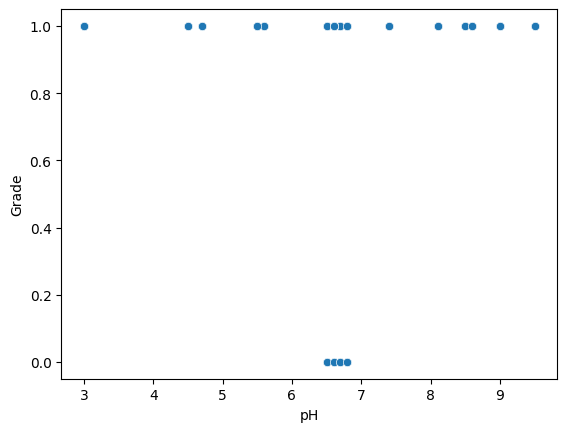

In [3]:
import seaborn as sns
sns.scatterplot(x='pH',y='Grade',data=df)

<Axes: xlabel='Temprature', ylabel='Grade'>

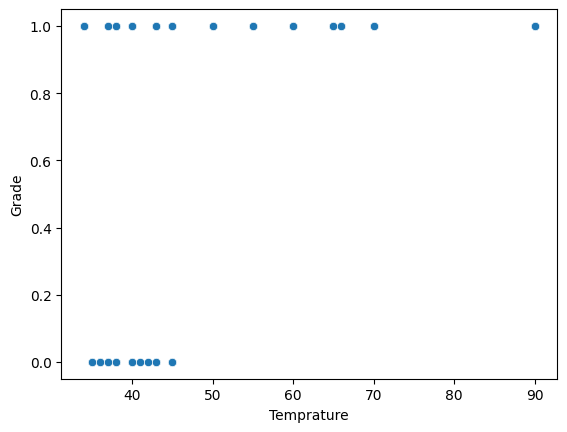

In [4]:
sns.scatterplot(x='Temprature',y='Grade',data=df)

In [5]:
#calculating correlation index
df.corr()
df.isnull().sum().sum()

0

In [6]:
#splitting data
X=df.drop('Grade',axis=1)
y=df['Grade']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg.score(X_test,y_test)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8686131386861314

In [7]:
from sklearn.metrics import accuracy_score, confusion_matrix
y_pred = log_reg.predict(X_test)
confusion_mat = confusion_matrix(y_test, y_pred)
confusion_mat

array([[44,  8],
       [10, 75]])

In [8]:
y_test.shape
y_pred = log_reg.predict(X_test)


In [9]:
#using support vector classifier
from sklearn.svm import SVC
svc_classifier=SVC(kernel='linear')
svc_classifier.fit(X_train,y_train)
svc_classifier.score(X_test,y_test)

0.948905109489051

In [10]:
#decision tree classifier
from sklearn.tree import DecisionTreeClassifier


In [11]:
classifier=DecisionTreeClassifier(criterion='gini')
classifier.fit(X_train,y_train)
classifier.score(X_test,y_test)


1.0

In [12]:
classifier.predict([[6.6	,35	,1	,0	,1	,0	,254]])

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=uint8)

In [13]:
def quality(predict):
  if(classifier.predict(predict)==1):
    print('Low Quality Milk')
  else:
    print('Good Quality Milk')

In [15]:
predict=[[1,27	,1	,0	,1	,0	,254]]
quality(predict)

Low Quality Milk


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [16]:
import joblib
joblib.dump(classifier,'milkquality')
milkquality=joblib.load('milkquality')
milkquality.predict([[6.6	,35	,1	,0	,1	,0	,254]])

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=uint8)